### V392 Per Spectral Index work

In [1]:
#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#the bulk of the data

In [3]:
data = ([58238.93,	1.26,	-0.0122,	0.0531,	1],
[58238.93,	1.74,	0.0298,	0.0385,	1],
[58238.93,	5,	0.0152,	0.012,	1],
[58238.93,	7,	-0.0184,	0.0143,	1],
[58246.67,	5,	0.232,	0.0125,	9],
[58246.67,	7,	0.3,	0.0125,	9],
[58246.68,	13.5,	0.435,	0.0181,	9],
[58246.68,	16.5,	0.342,	0.0186,	9],
[58246.68,	29.5,	0.968,	0.0239,	9],
[58246.68,	35,	0.913,	0.0231,	9],
[58250.64,	1.26,	0.114,	0.0474,	13],
[58250.64,	1.74,	0.15,	0.0419,	13],
[58250.64,	5,	0.5,	0.0132,	13],
[58250.64,	7,	0.751,	0.0147,	13],
[58255.65,	13.5,	7.378,	0.0135,	18],
[58255.65,	16.5,	8.321,	0.0171,	18],
[58255.65,	29.5,	11.851,	0.0286,	18],
[58255.65,	35,	12.991,	0.035,	18],
[58255.71,	8.416,	7.136,	0.0322,	18],
[58256.62,	1.26,	0.626,	0.0562,	19],
[58256.62,	1.74,	0.948,	0.0424,	19],
[58256.62,	5,	3.227,	0.0131,	19],
[58256.62,	7,	4.202,	0.0214,	19],
[58259.7,	4.868,	3.932,	0.0196,	22],
[58260.96,	1.26,	1.576,	0.0616,	23],
[58260.96,	1.74,	2.015,	0.041,	23],
[58260.96,	5,	4.523,	0.0134,	23],
[58260.96,	7,	5.889,	0.0152,	23],
[58269.56,	13.5,	7.582,	0.0116,	32],
[58269.56,	16.5,	8.545,	0.0131,	32],
[58269.56,	29.5,	14.418,	0.0485,	32],
[58269.56,	35,	17.162,	0.0565,	32],
[58269.61,	1.26,	3.471,	0.0551,	32],
[58269.61,	1.74,	3.887,	0.0374,	32],
[58269.61,	5,	5.226,	0.0122,	32],
[58269.61,	7,	5.994,	0.0134,	32],
[58278.53,	13.5,	6.545,	0.012,	41],
[58278.53,	16.5,	7.35,	0.0141,	41],
[58278.53,	29.5,	11.934,	0.0594,	41],
[58278.53,	35,	13.925,	0.07,	41],
[58278.58,	1.26,	3.704,	0.0571,	41],
[58278.58,	1.74,	3.746,	0.0413,	41],
[58278.58,	5,	4.419,	0.0123,	41],
[58278.58,	7,	4.984,	0.0137,	41],
[58280.64,	8.416,	1.98,	0.036,	43],
[58283.6,	4.868,	3.57,	0.025,	46],	
[58323.5,	4.868,	1.2,	0.02,	86],
#	1.4			90
[58347.5,	1.4,	0.22,	0.035,	110],
[58368.38,	13.5,	3.017,	0.0111,	131],
[58368.38,	16.5,	3.089,	0.0125,	131],
[58368.38,	29.5,	3.164,	0.0266,	131],
[58368.38,	35,	3.116,	0.0338,	131],
[58368.43,	1.26,	0.971,	0.272,	131],
[58368.43,	1.74,	0.85,	0.116,	131],
[58368.43,	5,	1.865,	0.017,	131],
[58368.43,	7,	2.333,	0.0126,	131],
[58379.39,	13.5,	2.444,	0.0118,	142],
[58379.39,	16.5,	2.475,	0.0127,	142],
[58379.39,	29.5,	2.364,	0.0237,	142],
[58379.39,	35,	2.193,	0.0256,	142],
[58379.44,	1.26,	1.033,	0.223,	142],
[58379.44,	1.74,	0.417,	0.125,	142],
[58379.44,	5,	1.637,	0.0158,	142],
[58379.44,	7,	2.018,	0.0125,	142],		
[58423.19,	13.5,	1.2,	0.0127,	186],
[58423.19,	16.5,	1.207,	0.0117,	186],
[58423.19,	29.5,	1.068,	0.0241,	186],
[58423.19,	35,	1.125,	0.0276,	186],
[58423.58,	1.26,	-0.108,	0.241,	186],
[58423.58,	1.74,	0.511,	0.107,	186],
[58423.58,	5,	1.121,	0.0201,	186],
[58423.58,	7,	1.165,	0.0165,	186],
[58460.18,	1.26,	0.105,	0.111,	223],
[58460.18,	1.74,	0.349,	0.0714,	223],
[58460.18,	5,	0.766,	0.0137,	223],
[58460.18,	7,	0.782,	0.0131,	223],	
[58461.08,	13.5,	0.738,	0.0119,	224],
[58461.08,	16.5,	0.717,	0.0121,	224],
[58461.08,	29.5,	0.57,	0.0229,	224],
[58461.08,	35,	0.593,	0.0273,	224],
[58493.11,	1.26,	0.178,	0.151,	256],
[58493.11,	1.74,	0.402,	0.0811,	256],
[58493.11,	5,	0.559,	0.0158,	256],
[58493.11,	7,	0.589,	0.0186,	256],
[58496.01,	13.5,	0.521,	0.0114,	259],
[58496.01,	16.5,	0.529,	0.0118,	259],
[58496.01,	29.5,	0.426,	0.0266,	259],
[58496.01,	35,	0.414,	0.0309,	259],
[58519.04,	1.26,	0.111,	0.109,	282],
[58519.04,	1.74,	0.41,	0.0637,	282],
[58519.04,	5,	0.492,	0.0127,	282],
[58519.04,	7,	0.457,	0.0126,	282],
[58627.98,	1.26,	0.0193,	0.086,	390],
[58627.98,	1.78,	0.177,	0.044,	390],
[58627.98,	5,	0.157,	0.0145,	390],
[58627.98,	7,	0.176,	0.0143,	390],
[58628.64,	13.5,	0.139,	0.034,	391],
[58628.64,	16.5,	0.125,	0.0399,	391],
[58628.64,	29.5,	0.126,	0.0373,	391],
[58628.64,	35,	-0.0704,	0.0471,	391],
[58652.58,	1.26,	0.104,	0.0989,	415],
[58652.58,	1.78,	0.0834,	0.0396,	415],
[58652.58,	5,	0.165,	0.0134,	415],
[58652.58,	7,	0.157,	0.0143,	415],
[58658.62,	13.5,	0.0657,	0.0114,	419],
[58658.62,	16.5,	0.0483,	0.0201,	419],
[58658.62,	29.5,	0.104,	0.0352,	419],
[58658.62,	35,	0.137,	0.0421,	419],
[58711.46,	13.5,	0.032,	0.014,	474],
[58711.46,	16.5,	0.007,	0.015,	474],
[58711.46,	29.5,	-0.033,	0.034,	474],
[58711.46,	35,	-0.031,	0.043,	474],
[58712.62,	1.26,	0.38,	0.09,	475],
[58712.62,	1.78,	0.255,	0.067,	475],
[58712.62,	5,	0.075,	0.017,	475],
[58712.62,	7,	0.056,	0.02,	475],
#[58765.29,	1.26			528],
[58765.29,	1.78,	0.0962,	0.066,	528],
[58765.29,	5,	0.0426,	0.016,	528],
[58765.29,	7,	0.0304,	0.016,	528],
#[58839.82,	5,			611],
#[58839.82,	7,			611
[58839.82,	13.5,	0.0592,	0.017,	611],
[58839.82,	16.5,	0.0631,	0.018,	611],
[58839.82,	29.5,	0.002,	0.04,	611],
[58839.82,	35,	0.02,	0.044,	611],
[58924.11,	5,	0.117,	0.022,	687],
[58924.11,	7,	0.088,	0.021,	687],
[58924.11,	13.5,	0.037,	0.017,	687],
[58924.11,	16.5,	0.024,	0.018,	687],
[58924.11,	29.5,	0.14,	0.036,	687],
[58924.11,	35,	0.05,	0.041,	687],
[58984.93,	5,	0.0606,	0.016,	747],
[58984.93,	7,	0.062,	0.015,	747],
[58984.93,	13.5,	0.0423,	0.017,	747],
[58984.93,	16.5,	0.0532,	0.018,	747],
[58984.93,	29.5,	0.0229,	0.037,	747],
[58984.93,	35,	0.008,	0.043,	747])

df =  pd.DataFrame(data, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

In [4]:
#now to seperate it into days

In [7]:
E1=([58238.93,	1.26,	-0.0122,	0.0531,	1],
[58238.93,	1.74,	0.0298,	0.0385,	1],
[58238.93,	5,	0.0152,	0.012,	1],
[58238.93,	7,	-0.0184,	0.0143,	1],)

 
E2=([58246.67,	5,	0.232,	0.0125,	9],
[58246.67,	7,	0.3,	0.0125,	9],
[58246.68,	13.5,	0.435,	0.0181,	9],
[58246.68,	16.5,	0.342,	0.0186,	9],
[58246.68,	29.5,	0.968,	0.0239,	9],
[58246.68,	35,	0.913,	0.0231,	9],)

 
E3=([58250.64,	1.26,	0.114,	0.0474,	13],
[58250.64,	1.74,	0.15,	0.0419,	13],
[58250.64,	5,	0.5,	0.0132,	13],
[58250.64,	7,	0.751,	0.0147,	13],)

 
E4=([58255.65,	13.5,	7.378,	0.0135,	18],
[58255.65,	16.5,	8.321,	0.0171,	18],
[58255.65,	29.5,	11.851,	0.0286,	18],
[58255.65,	35,	12.991,	0.035,	18],
[58255.71,	8.416,	7.136,	0.0322,	18],)

 
E5=([58256.62,	1.26,	0.626,	0.0562,	19],
[58256.62,	1.74,	0.948,	0.0424,	19],
[58256.62,	5,	3.227,	0.0131,	19],
[58256.62,	7,	4.202,	0.0214,	19],)

 
E6=(#[58259.7,	4.868,	3.932,	0.0196,	22],
[58260.96,	1.26,	1.576,	0.0616,	23],
[58260.96,	1.74,	2.015,	0.041,	23],
[58260.96,	5,	4.523,	0.0134,	23],
[58260.96,	7,	5.889,	0.0152,	23],)

 
E7=([58269.56,	13.5,	7.582,	0.0116,	32],
[58269.56,	16.5,	8.545,	0.0131,	32],
[58269.56,	29.5,	14.418,	0.0485,	32],
[58269.56,	35,	17.162,	0.0565,	32],
[58269.61,	1.26,	3.471,	0.0551,	32],
[58269.61,	1.74,	3.887,	0.0374,	32],
[58269.61,	5,	5.226,	0.0122,	32],
[58269.61,	7,	5.994,	0.0134,	32],)

 
E8=([58278.53,	13.5,	6.545,	0.012,	41],
[58278.53,	16.5,	7.35,	0.0141,	41],
[58278.53,	29.5,	11.934,	0.0594,	41],
[58278.53,	35,	13.925,	0.07,	41],
[58278.58,	1.26,	3.704,	0.0571,	41],
[58278.58,	1.74,	3.746,	0.0413,	41],
[58278.58,	5,	4.419,	0.0123,	41],
[58278.58,	7,	4.984,	0.0137,	41],)


#not using the following due to only one data point a day
#[58280.64,	8.416,	1.98,	0.036,	43],

 
#[58283.6,	4.868,	3.57,	0.025,	46],

 
#[58323.5,	4.868,	1.2,	0.02,	86],
#	1.4			90

 
#[58347.5,	1.4,	0.22,	0.035,	110],

 
E9=([58368.38,	13.5,	3.017,	0.0111,	131],
[58368.38,	16.5,	3.089,	0.0125,	131],
[58368.38,	29.5,	3.164,	0.0266,	131],
[58368.38,	35,	3.116,	0.0338,	131],
[58368.43,	1.26,	0.971,	0.272,	131],
[58368.43,	1.74,	0.85,	0.116,	131],
[58368.43,	5,	1.865,	0.017,	131],
[58368.43,	7,	2.333,	0.0126,	131],)

 
E10=([58379.39,	13.5,	2.444,	0.0118,	142],
[58379.39,	16.5,	2.475,	0.0127,	142],
[58379.39,	29.5,	2.364,	0.0237,	142],
[58379.39,	35,	2.193,	0.0256,	142],
[58379.44,	1.26,	1.033,	0.223,	142],
[58379.44,	1.74,	0.417,	0.125,	142],
[58379.44,	5,	1.637,	0.0158,	142],
[58379.44,	7,	2.018,	0.0125,	142],)	

 
E11=([58423.19,	13.5,	1.2,	0.0127,	186],
[58423.19,	16.5,	1.207,	0.0117,	186],
[58423.19,	29.5,	1.068,	0.0241,	186],
[58423.19,	35,	1.125,	0.0276,	186],
[58423.58,	1.26,	-0.108,	0.241,	186],
[58423.58,	1.74,	0.511,	0.107,	186],
[58423.58,	5,	1.121,	0.0201,	186],
[58423.58,	7,	1.165,	0.0165,	186],)

 
E12=([58460.18,	1.26,	0.105,	0.111,	223],
[58460.18,	1.74,	0.349,	0.0714,	223],
[58460.18,	5,	0.766,	0.0137,	223],
[58460.18,	7,	0.782,	0.0131,	223],)	

 
E13=([58461.08,	13.5,	0.738,	0.0119,	224],
[58461.08,	16.5,	0.717,	0.0121,	224],
[58461.08,	29.5,	0.57,	0.0229,	224],
[58461.08,	35,	0.593,	0.0273,	224],)


 
E14=([58493.11,	1.26,	0.178,	0.151,	256],
[58493.11,	1.74,	0.402,	0.0811,	256],
[58493.11,	5,	0.559,	0.0158,	256],
[58493.11,	7,	0.589,	0.0186,	256],)

 
E15=([58496.01,	13.5,	0.521,	0.0114,	259],
[58496.01,	16.5,	0.529,	0.0118,	259],
[58496.01,	29.5,	0.426,	0.0266,	259],
[58496.01,	35,	0.414,	0.0309,	259],)

 
E16=([58519.04,	1.26,	0.111,	0.109,	282],
[58519.04,	1.74,	0.41,	0.0637,	282],
[58519.04,	5,	0.492,	0.0127,	282],
[58519.04,	7,	0.457,	0.0126,	282],)

 
E17=([58627.98,	1.26,	0.0193,	0.086,	390],
[58627.98,	1.78,	0.177,	0.044,	390],
[58627.98,	5,	0.157,	0.0145,	390],
[58627.98,	7,	0.176,	0.0143,	390],)

 
E18=([58628.64,	13.5,	0.139,	0.034,	391],
[58628.64,	16.5,	0.125,	0.0399,	391],
[58628.64,	29.5,	0.126,	0.0373,	391],
[58628.64,	35,	-0.0704,	0.0471,	391],)

 
E19=([58652.58,	1.26,	0.104,	0.0989,	415],
[58652.58,	1.78,	0.0834,	0.0396,	415],
[58652.58,	5,	0.165,	0.0134,	415],
[58652.58,	7,	0.157,	0.0143,	415],)

 
E20=([58658.62,	13.5,	0.0657,	0.0114,	419],
[58658.62,	16.5,	0.0483,	0.0201,	419],
[58658.62,	29.5,	0.104,	0.0352,	419],
[58658.62,	35,	0.137,	0.0421,	419],)

 
E21=([58711.46,	13.5,	0.032,	0.014,	474],
[58711.46,	16.5,	0.007,	0.015,	474],
[58711.46,	29.5,	-0.033,	0.034,	474],
[58711.46,	35,	-0.031,	0.043,	474],)

 
E22=([58712.62,	1.26,	0.38,	0.09,	475],
[58712.62,	1.78,	0.255,	0.067,	475],
[58712.62,	5,	0.075,	0.017,	475],
[58712.62,	7,	0.056,	0.02,	475],)

 
E23=(#[58765.29,	1.26			528],
[58765.29,	1.78,	0.0962,	0.066,	528],
[58765.29,	5,	0.0426,	0.016,	528],
[58765.29,	7,	0.0304,	0.016,	528],)

 
E24=(#[58839.82,	5,			611],
#[58839.82,	7,			611
[58839.82,	13.5,	0.0592,	0.017,	611],
[58839.82,	16.5,	0.0631,	0.018,	611],
[58839.82,	29.5,	0.002,	0.04,	611],
[58839.82,	35,	0.02,	0.044,	611],)

 
E25=([58924.11,	5,	0.117,	0.022,	687],
[58924.11,	7,	0.088,	0.021,	687],
[58924.11,	13.5,	0.037,	0.017,	687],
[58924.11,	16.5,	0.024,	0.018,	687],
[58924.11,	29.5,	0.14,	0.036,	687],
[58924.11,	35,	0.05,	0.041,	687],)

 
E26=([58984.93,	5,	0.0606,	0.016,	747],
[58984.93,	7,	0.062,	0.015,	747],
[58984.93,	13.5,	0.0423,	0.017,	747],
[58984.93,	16.5,	0.0532,	0.018,	747],
[58984.93,	29.5,	0.0229,	0.037,	747],
[58984.93,	35,	0.008,	0.043,	747])


In [8]:
df1 =  pd.DataFrame(E1, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df2 =  pd.DataFrame(E2, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df3 =  pd.DataFrame(E3, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df4 =  pd.DataFrame(E4, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df5 =  pd.DataFrame(E5, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df6 =  pd.DataFrame(E6, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df7 =  pd.DataFrame(E7, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df8 =  pd.DataFrame(E8, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df9 =  pd.DataFrame(E9, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df10 =  pd.DataFrame(E10, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df11 =  pd.DataFrame(E11, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df12 =  pd.DataFrame(E12, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df13 =  pd.DataFrame(E13, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df14 =  pd.DataFrame(E14, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df15 =  pd.DataFrame(E15, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df16 =  pd.DataFrame(E16, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df17 =  pd.DataFrame(E17, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df18 =  pd.DataFrame(E18, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df19 =  pd.DataFrame(E19, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df20 =  pd.DataFrame(E20, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df21 =  pd.DataFrame(E21, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df22 =  pd.DataFrame(E22, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df23 =  pd.DataFrame(E23, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df24 =  pd.DataFrame(E24, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df25 =  pd.DataFrame(E25, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])

df26 =  pd.DataFrame(E26, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)",	"Days"])


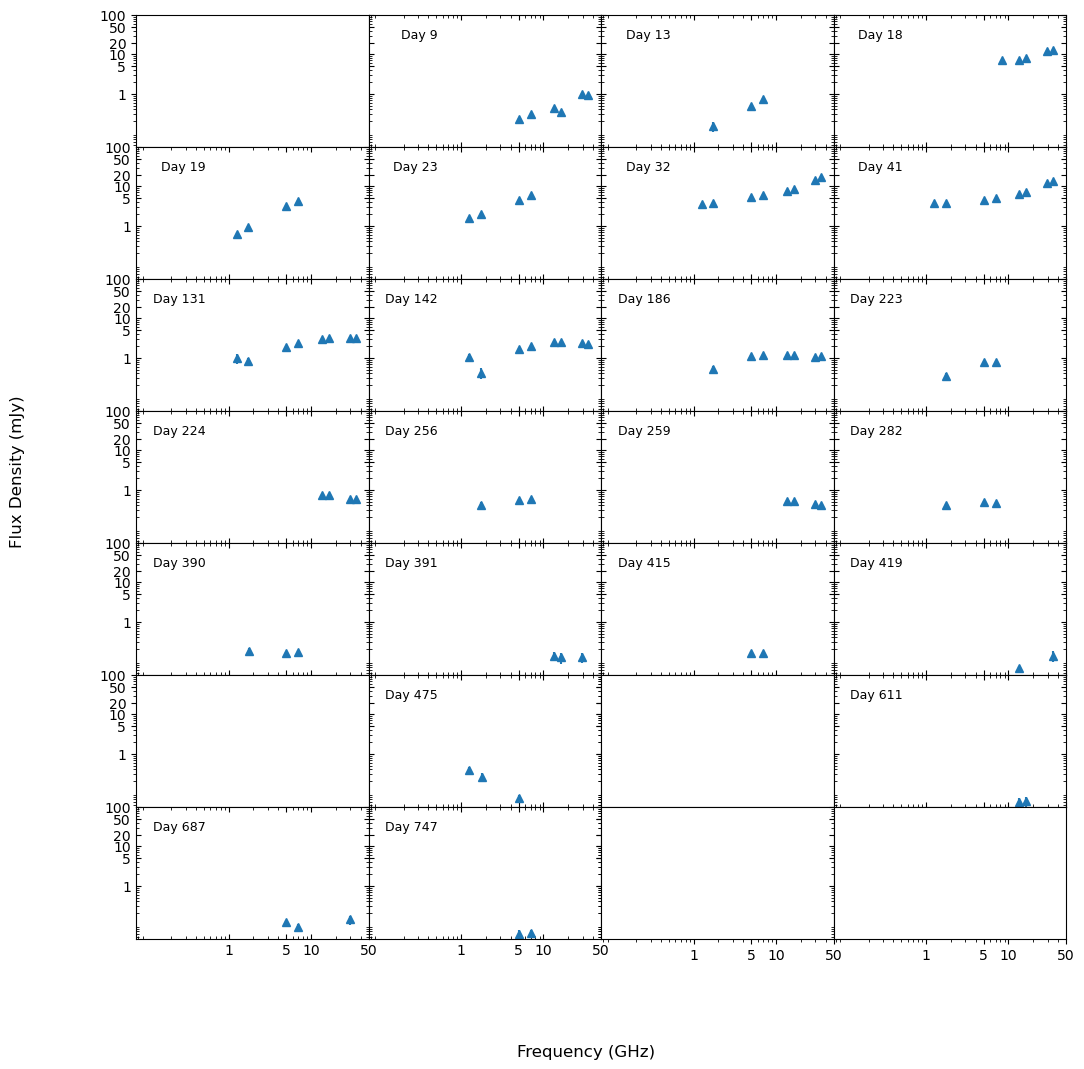

In [11]:
#putting them all in a list
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10,
       df11, df12, df13, df14, df15, df16, df17, df18, df19, df20,
       df21, df22, df23, df24, df25, df26]


#the days by the list so they can all be defined
annotations = ['Day 1','Day 9','Day 13','Day 18','Day 19','Day 23','Day 32','Day 41','Day 131',
               'Day 142','Day 186','Day 223','Day 224','Day 256','Day 259','Day 282','Day 390','Day 391',
               'Day 415','Day 419','Day 474','Day 475','Day 528','Day 611','Day 687','Day 747',]

#making the figure (7,4) is the (rows, columns)
fig, ax = plt.subplots(7, 4, sharex='all', sharey='all')
fig.set_size_inches(12, 12)
fig.subplots_adjust(hspace=0, wspace=0)

#loop for each of the datasets
for idx, (df, label) in enumerate(zip(dfs, annotations)):
    row, col = divmod(idx, 4)
    mask = df['Flux (mJy)'] > 3 * df['eFlux (mJy)'] #don't show the non-detections
    if mask.any():
        ax[row, col].errorbar(df['Freq (GHz)'][mask], df['Flux (mJy)'][mask], yerr=df['eFlux (mJy)'][mask], fmt='^')
        ax[row, col].set_xscale('log')
        ax[row, col].set_yscale('log')
        ax[row, col].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
        ax[row, col].set_yticks([1, 5, 10, 20, 50, 100], labels=['1', '5', '10', '20', '50', '100'])
        ax[row, col].annotate(label, xy=(50, 85), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
        ax[row, col].tick_params(axis='both', which='both', direction='in', top=True, right=True)

fig.supxlabel("Frequency (GHz)")
fig.supylabel("Flux Density (mJy)")
plt.show();

### Now to sort it out

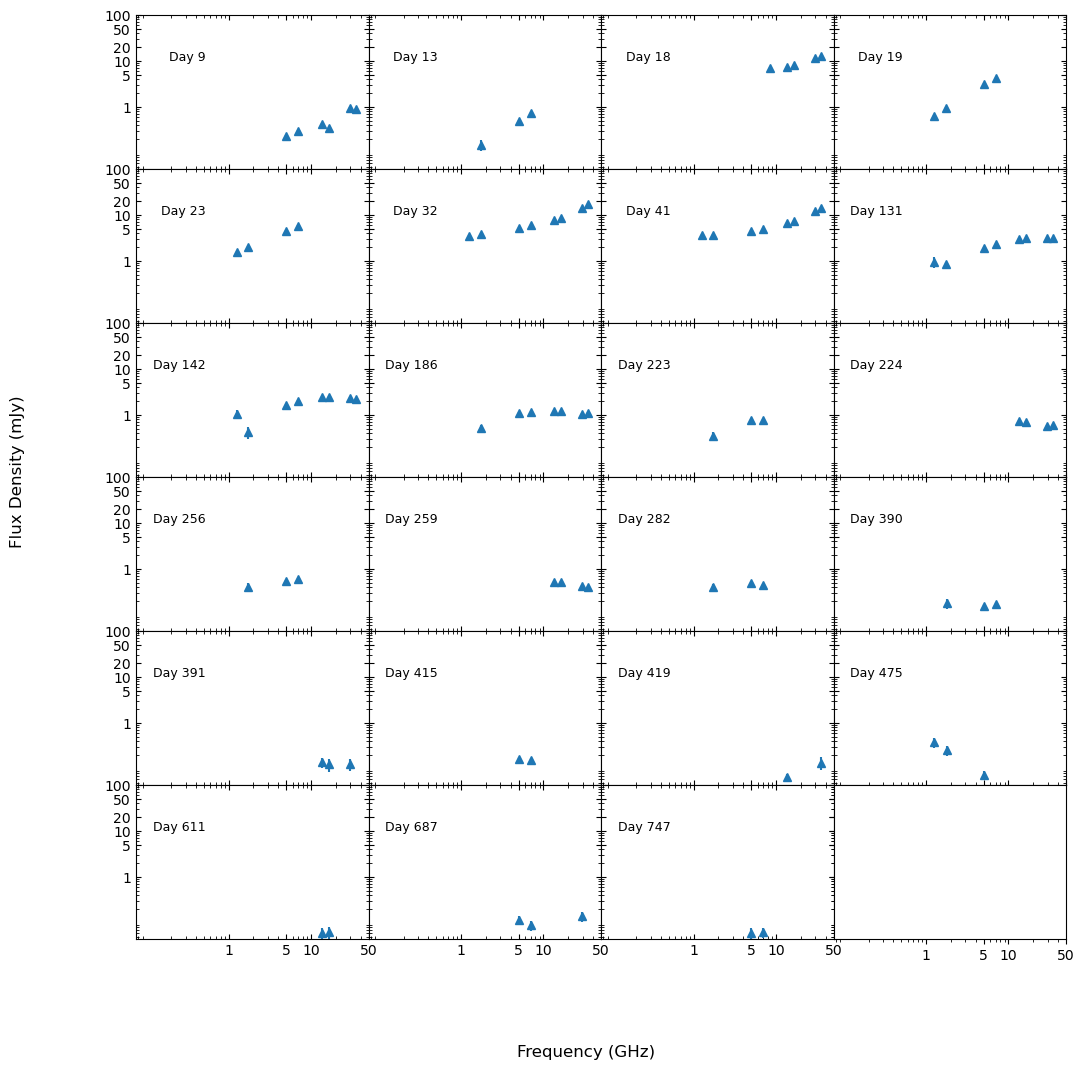

In [12]:
dfs = [ df2, df3, df4, df5, df6, df7, df8, df9, df10,
       df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df22, df24, df25, df26]


#the days by the list so they can all be defined
annotations = ['Day 9','Day 13','Day 18','Day 19','Day 23','Day 32','Day 41','Day 131',
               'Day 142','Day 186','Day 223','Day 224','Day 256','Day 259','Day 282','Day 390','Day 391',
               'Day 415','Day 419','Day 475','Day 611','Day 687','Day 747',]

#making the figure (7,4) is the (rows, columns)
fig, ax = plt.subplots(6, 4, sharex='all', sharey='all')
fig.set_size_inches(12, 12)
fig.subplots_adjust(hspace=0, wspace=0)

#loop for each of the datasets
for idx, (df, label) in enumerate(zip(dfs, annotations)):
    row, col = divmod(idx, 4)
    mask = df['Flux (mJy)'] > 3 * df['eFlux (mJy)'] #don't show the non-detections
    if mask.any():
        ax[row, col].errorbar(df['Freq (GHz)'][mask], df['Flux (mJy)'][mask], yerr=df['eFlux (mJy)'][mask], fmt='^')
        ax[row, col].set_xscale('log')
        ax[row, col].set_yscale('log')
        ax[row, col].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
        ax[row, col].set_yticks([1, 5, 10, 20, 50, 100], labels=['1', '5', '10', '20', '50', '100'])
        ax[row, col].annotate(label, xy=(50, 85), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
        ax[row, col].tick_params(axis='both', which='both', direction='in', top=True, right=True)

fig.supxlabel("Frequency (GHz)")
fig.supylabel("Flux Density (mJy)")
plt.show();